# Importação Dos Pacotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação Dos Dados

In [2]:
url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

data = pd.read_csv(url, compression = 'zip')

# Análise e Limpeza Dos Dados

In [3]:
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Desafio 1 - Por que a classe tratamento é tão desbalanceada

In [4]:
data_droga_trat = data.groupby(['tratamento','droga']).size()
data_droga_trat

tratamento    droga    
com_controle  cacb2b860    1866
com_droga     00199ff52       6
              00251fc41       6
              00321ea80      12
              0034c0847       6
                           ... 
              ff9565933       6
              ffd66e220       6
              ffe357f8f       1
              ffed8e1c9       6
              fff7d208d       6
Length: 3289, dtype: int64

Agrupando a o dataframe pela coluna tratamento e por droga e calculando o tamanho, percebemos que todos os experimentos 'com_controle' possuem a coluna droga como 'cacb2b860' podendo indicar a ausência da droga, o que faz sentido ter menos experimentos já que o que vai variar no controle são as outras váriaveis tempo, e dose(a dose nesse caso pode indicar o tamanho do grupo de controle), e não a variável droga

# Desafio 2 - Plotar as 5 últimas linhas do dataframe

In [5]:
data.tail(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


# Desafio 3 - Proporção na classe tratamento

In [ ]:
data['tratamento'].value_counts(normalize=True)

# Desafio 4 - Quantos tipos de droga foram investigados

In [ ]:
data['droga'].nunique()

# Desafio 5 - Documentação da função query do pandas

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

# Desafio 6 - Renomear as colunas retirando o hífen

In [7]:
data.columns = data.columns.str.replace('-', '')

In [8]:
data.query('g0 > 0')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,...,0.8775,0.5230,0.1589,0.7715,0.5497,0.6929,0.3738,0.8636,0.4494,0.1218
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,...,0.0789,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


In [9]:
 data['tratamento'].value_counts(normalize=True).reset_index(name='proporcao')

,index,proporcao
0,com_droga,0.921643
1,com_controle,0.078357


# Desafio 7 - Melhorar os gráficos

In [10]:
#Criando outro dataframe com a propoção da classe tratamento
prop_trat = data['tratamento'].value_counts(normalize=True).reset_index()
prop_trat.columns = ['tratamento', 'proporcao']
prop_trat

,tratamento,proporcao
0,com_droga,0.921643
1,com_controle,0.078357


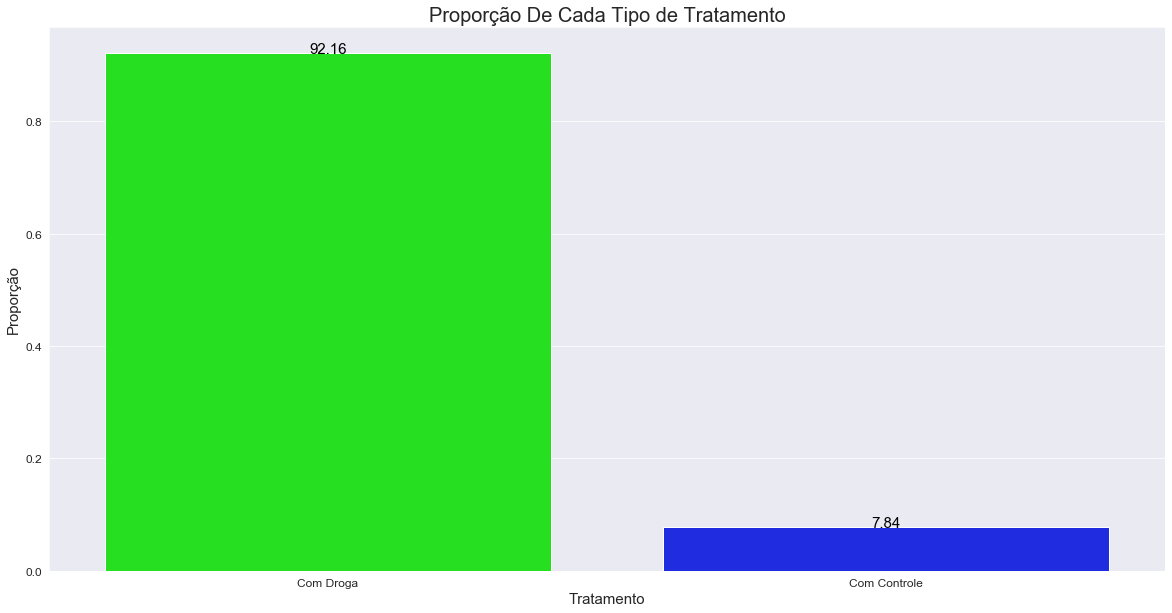

In [11]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,10)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("hsv", 2))

#Criando o gráfico 
sns.barplot(x='tratamento', y='proporcao', data=prop_trat, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
ax.set_xticklabels(labels= ['Com Droga', 'Com Controle'])
plt.title('Proporção De Cada Tipo de Tratamento', fontsize=20)
plt.xlabel('Tratamento', fontsize=15)
plt.ylabel('Proporção', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)

#Adicionando os valores acima da barra
for index, row in prop_trat.iterrows():
    ax.text(index, row['proporcao'], round(row['proporcao'] * 100,2), color='black', ha="center", fontsize=15)
    
#Mostrando o gráfico
plt.show()

In [12]:
#Contando a quantidade de experimentos pelo tempo
df_group_tempo = data.groupby('tempo').size().reset_index(name='quantidade')
df_group_tempo = df_group_tempo.sort_values('quantidade', ascending=False,  ignore_index=True)
df_group_tempo

,tempo,quantidade
0,48,8250
1,72,7792
2,24,7772


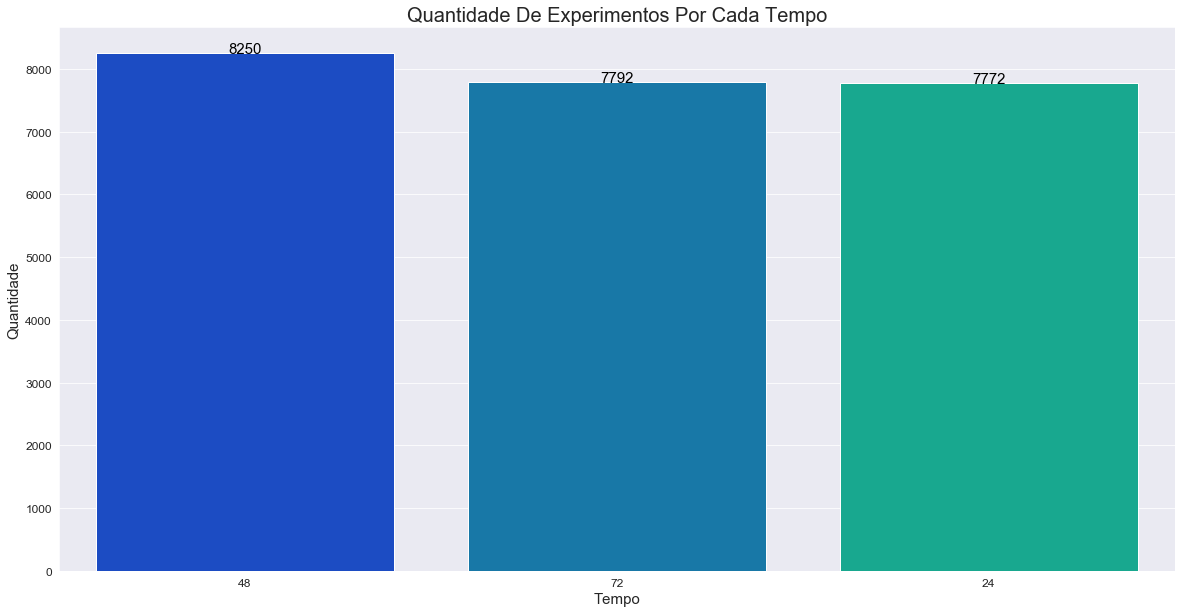

In [13]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,10)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 3 cores
sns.set_palette(sns.color_palette("winter", 3))

#Criando o gráfico 
sns.barplot(x='tempo', y='quantidade', data=df_group_tempo, ax=ax, order=df_group_tempo['tempo'])

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Quantidade De Experimentos Por Cada Tempo', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Adicionando os valores acima da barra
for index, row in df_group_tempo.iterrows():
    ax.text(index, row['quantidade'], row['quantidade'], color='black', ha="center", fontsize=15)

#Mostrando o gráfico
plt.show()

In [14]:
#Agrupando por dose e comparando a proporção de tratamento
data_group_dose = data.groupby('dose')['tratamento'].value_counts(normalize=True)
data_group_dose = data_group_dose.reset_index(name='Proporcao')
data_group_dose['tratamento'] = data_group_dose['tratamento'].str.replace('com_droga', 'Com Droga')
data_group_dose['tratamento'] = data_group_dose['tratamento'].str.replace('com_controle', 'Com Controle')
data_group_dose

,dose,tratamento,Proporcao
0,D1,Com Droga,0.921709
1,D1,Com Controle,0.078291
2,D2,Com Droga,0.921574
3,D2,Com Controle,0.078426


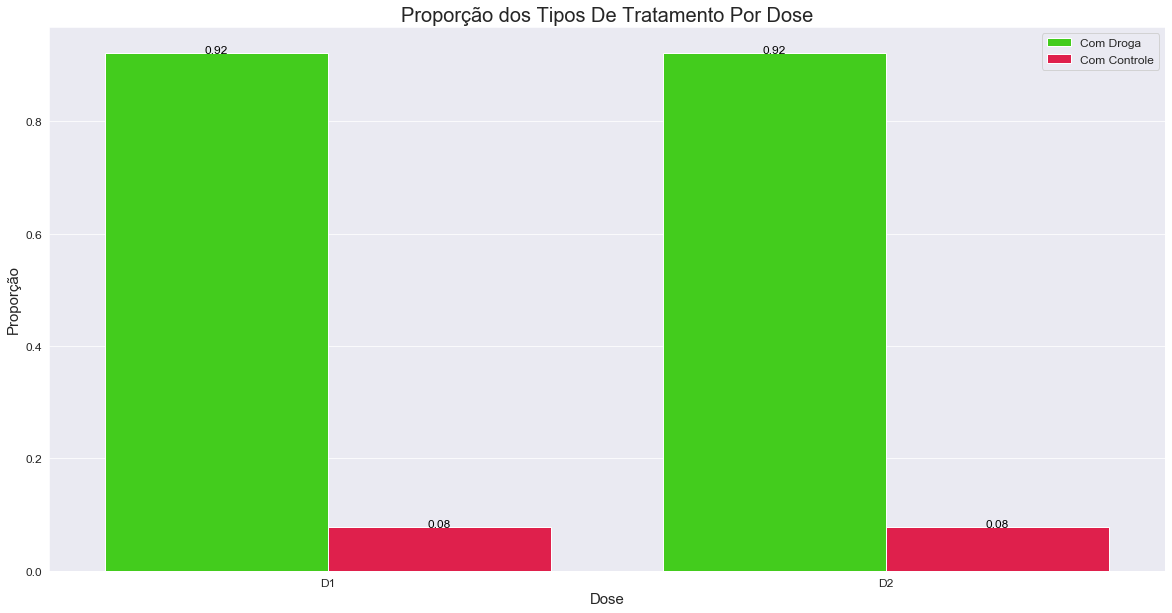

In [15]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,10)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("prism", 2))

#Criando o gráfico
sns.barplot(x='dose', y='Proporcao', hue='tratamento', data=data_group_dose, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Proporção dos Tipos De Tratamento Por Dose', fontsize=20)
plt.xlabel('Dose', fontsize=15)
plt.ylabel('Proporção', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#Adicionando os valores acima da barra
dict_loc = {0:-0.2, 1:0.2, 2:0.8, 3:1.2}
for index, row in data_group_dose.iterrows():
    ax.text(dict_loc[index], row['Proporcao'], round(row['Proporcao'],2), color='black', ha="center", fontsize=12)
    
#Mostrando o gráfico
plt.show()

In [16]:
#Agrupando por tempo e comparando a proporção de tratamento
data_group_tempo = data.groupby('tempo')['tratamento'].value_counts(normalize=True)
data_group_tempo = data_group_tempo.reset_index(name='Proporcao')
data_group_tempo['tratamento'] = data_group_tempo['tratamento'].str.replace('com_droga', 'Com Droga')
data_group_tempo['tratamento'] = data_group_tempo['tratamento'].str.replace('com_controle', 'Com Controle')

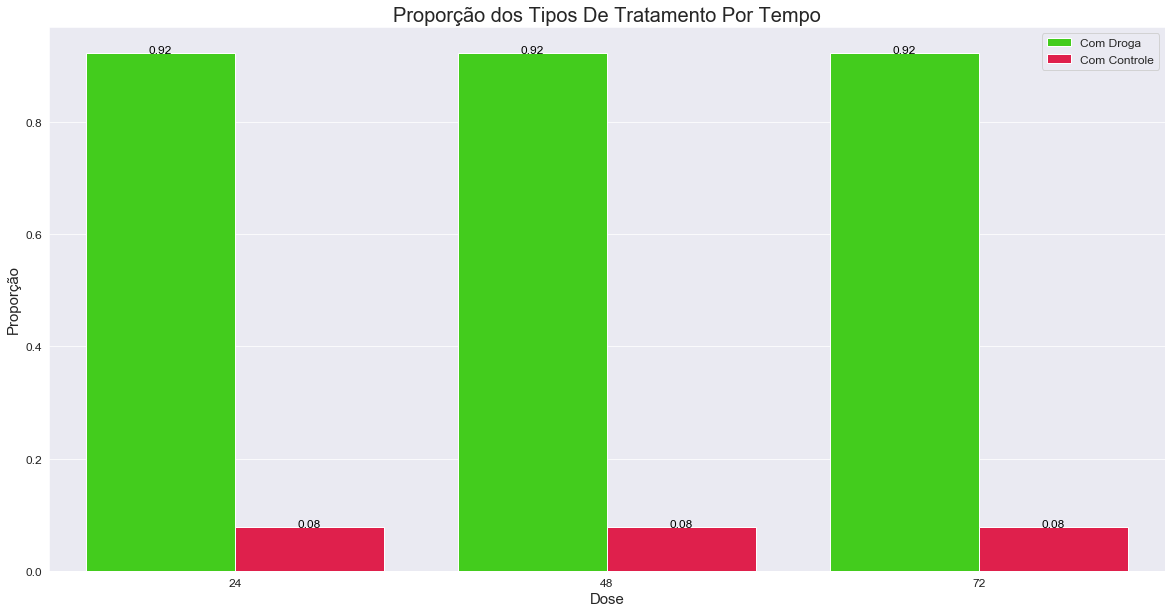

In [29]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,10)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("prism", 2))

#Criando o gráfico
sns.barplot(x='tempo', y='Proporcao', hue='tratamento', data=data_group_tempo, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Proporção dos Tipos De Tratamento Por Tempo', fontsize=20)
plt.xlabel('Dose', fontsize=15)
plt.ylabel('Proporção', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#Adicionando os valores acima da barra
dict_loc = {0:-0.2, 1:0.2, 2:0.8, 3:1.2, 4:1.8, 5:2.2}
for index, row in data_group_tempo.iterrows():
    ax.text(dict_loc[index], row['Proporcao'], round(row['Proporcao'],2), color='black', ha="center", fontsize=12)
    
#Mostrando o gráfico
plt.show()

# Partindo da hipótese que os dados das variáveis numéricas estão normalizados podemos analisar suas distribuições para checar se assemelham a uma distribuição normal, aqui estão os gráficos das 9 primeiras variáveis numéricas

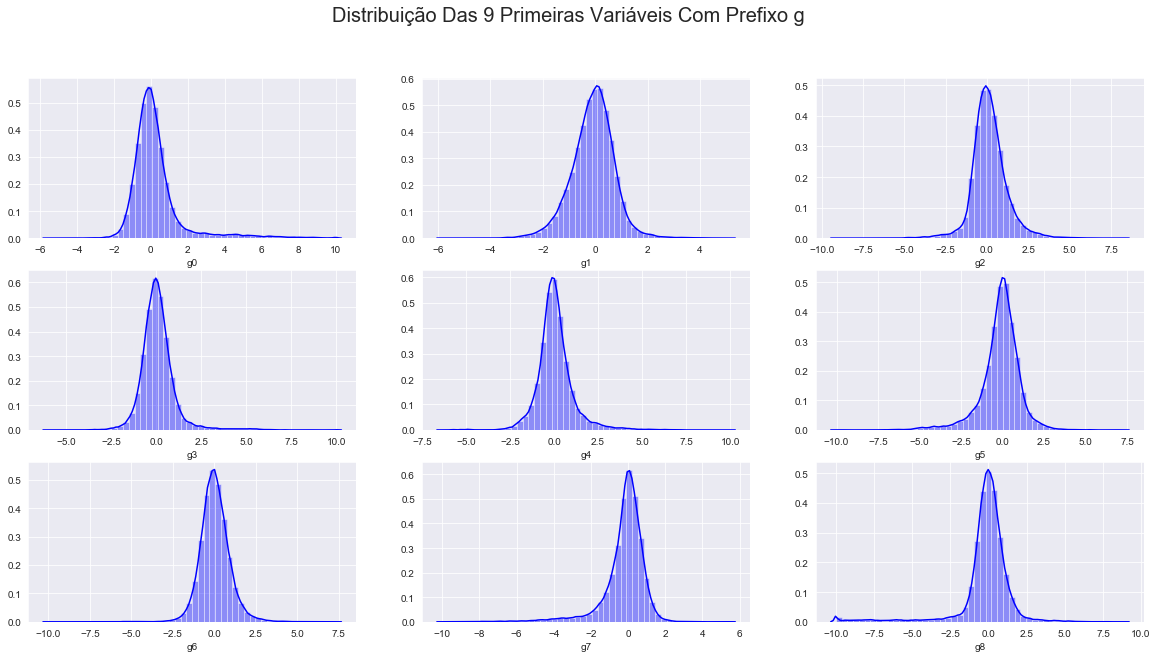

In [34]:
#Criando figura e eixos
fig, ax = plt.subplots(3, 3, figsize=(20,10)) 

#Criando o gráfico
sns.distplot(data['g0'], ax=ax[0,0],color='b')
sns.distplot(data['g1'], ax=ax[0,1],color='b')
sns.distplot(data['g2'], ax=ax[0,2],color='b')
sns.distplot(data['g3'], ax=ax[1,0],color='b')
sns.distplot(data['g4'], ax=ax[1,1],color='b')
sns.distplot(data['g5'], ax=ax[1,2],color='b')
sns.distplot(data['g6'], ax=ax[2,0],color='b')
sns.distplot(data['g7'], ax=ax[2,1],color='b')
sns.distplot(data['g8'], ax=ax[2,2],color='b')

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Distribuição Das 9 Primeiras Variáveis Com Prefixo g', fontsize=20)
    
#Mostrando o gráfico
plt.show()

De fato observando as distribuições é possível ver que algumas seguem uma distribuição normal e outras se aproximam de uma, também notamos que a maior incidência de valores está sempre perto do zero

# Desafio 8 - Resumo

A partir dos dados e dos gráficos observamos que os experimentos seguem o padrão de criar um experimento controle com determinada condição e em cima desse controle é possível realizar diversos experimentos variando apenas a droga, por esta razão a proporção de experimentos com droga é muito maior.

Dados obtidos:

Proporção na classe tratamento - 92.16% com_droga e 7.84 com_controle
Quantidade de drogas diferentes - 3289
A proporção na classe tratamento não muda conforme a dose e o tempo

Nome : Pedro Henrique Corrêa de Almeida
Linkedin : https://www.linkedin.com/in/pedro-henrique-corr%C3%AAa-de-almeida-15398b105/